# Anscombe's Quartet

Source: [Wikipedia](https://en.wikipedia.org/wiki/Anscombe's_quartet)

In [1]:
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### Load data

In [2]:
data = pd.DataFrame({'x1': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
     'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
     'x2': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0,],
     'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
     'x3': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0,],
     'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
     'x4': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
     'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]})
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


### Basic statistics

In [3]:
print "Basic statistics"
trendlines = []
for i in xrange(1, 5):
    x, y = "x" + str(i), "y" + str(i)
    df = data[[x, y]]
    x_mean, y_mean = df.mean()
    x_std, y_std = df.std()
    slope, intercept, r_value, p_value, std_err = linregress(df)
    trendlines.append((slope, intercept))
    print "%d) x: mean %5.3f, std %5.3f;  y: mean %5.3f, std %5.3f;  " \
        "y = %5.3fx + %5.3f;  corr %5.3f, err. %5.3f" % \
        (i, x_mean, x_std, y_mean, y_std, slope, intercept, r_value, std_err)

Basic statistics
1) x: mean 9.000, std 3.317;  y: mean 7.501, std 2.032;  y = 0.500x + 3.000;  corr 0.816, err. 0.118
2) x: mean 9.000, std 3.317;  y: mean 7.501, std 2.032;  y = 0.500x + 3.001;  corr 0.816, err. 0.118
3) x: mean 9.000, std 3.317;  y: mean 7.500, std 2.030;  y = 0.500x + 3.002;  corr 0.816, err. 0.118
4) x: mean 9.000, std 3.317;  y: mean 7.501, std 2.031;  y = 0.500x + 3.002;  corr 0.817, err. 0.118


Wow, these datasets are pretty much identical!

### Basic visualizations

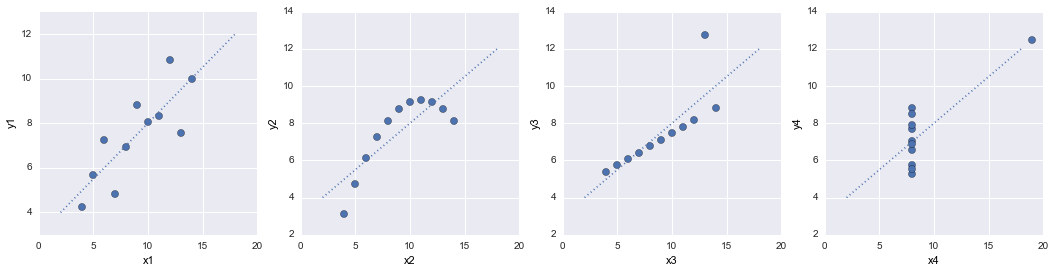

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
for i in xrange(1, 5):
    x, y = "x" + str(i), "y" + str(i)
    data.plot(kind='scatter', x=x, y=y, ax=axes[i-1], s=50)
    slope, intercept = trendlines[i - 1]
    axes[i - 1].plot([2, 18], [intercept + 2 * slope, intercept + 18 * slope], ':')

Whoops, they are pretty different..